In [7]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('../data/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
# Aggregate features for each customer
agg_features = df.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    average_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_dev_transaction_amount=('Amount', 'std')
).reset_index()

print(agg_features)


           CustomerId  total_transaction_amount  average_transaction_amount  transaction_count  std_dev_transaction_amount
0        CustomerId_1                  -10000.0               -10000.000000                  1                         NaN
1       CustomerId_10                  -10000.0               -10000.000000                  1                         NaN
2     CustomerId_1001                   20000.0                 4000.000000                  5                 6558.963333
3     CustomerId_1002                    4225.0                  384.090909                 11                  560.498966
4     CustomerId_1003                   20000.0                 3333.333333                  6                 6030.478146
...               ...                       ...                         ...                ...                         ...
3737   CustomerId_992                   20000.0                 3333.333333                  6                 6088.240030
3738   CustomerI

In [10]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract features
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

print(df[['CustomerId', 'TransactionStartTime', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']])


            CustomerId      TransactionStartTime  transaction_hour  transaction_day  transaction_month  transaction_year
0      CustomerId_4406 2018-11-15 02:18:49+00:00                 2               15                 11              2018
1      CustomerId_4406 2018-11-15 02:19:08+00:00                 2               15                 11              2018
2      CustomerId_4683 2018-11-15 02:44:21+00:00                 2               15                 11              2018
3       CustomerId_988 2018-11-15 03:32:55+00:00                 3               15                 11              2018
4       CustomerId_988 2018-11-15 03:34:21+00:00                 3               15                 11              2018
...                ...                       ...               ...              ...                ...               ...
95657  CustomerId_3078 2019-02-13 09:54:09+00:00                 9               13                  2              2019
95658  CustomerId_3874 2019-02-1

In [11]:
# One-Hot Encoding
categorical_features = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print(df.head())


         TransactionId         BatchId       AccountId       SubscriptionId       CustomerId   Amount  Value      TransactionStartTime  transaction_hour  transaction_day  transaction_month  transaction_year  ProviderId_ProviderId_2  ProviderId_ProviderId_3  ProviderId_ProviderId_4  ProviderId_ProviderId_5  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406   1000.0   1000 2018-11-15 02:18:49+00:00                 2               15                 11              2018                    False                    False                    False                    False   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406    -20.0     20 2018-11-15 02:19:08+00:00                 2               15                 11              2018                    False                    False                     True                    False   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionI

In [12]:
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
Amount,0,95662,0.0
Value,0,95662,0.0
TransactionStartTime,0,95662,0.0
transaction_hour,0,95662,0.0
transaction_day,0,95662,0.0


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler = MinMaxScaler()
df['Amount_normalized'] = scaler.fit_transform(df[['Amount']])

# Standardization
standardizer = StandardScaler()
df['Amount_standardized'] = standardizer.fit_transform(df[['Amount']])

print(df[['Amount', 'Amount_normalized', 'Amount_standardized']].head())


    Amount  Amount_normalized  Amount_standardized
0   1000.0           0.092004            -0.046371
1    -20.0           0.091910            -0.054643
2    500.0           0.091958            -0.050426
3  20000.0           0.093750             0.107717
4   -644.0           0.091853            -0.059704


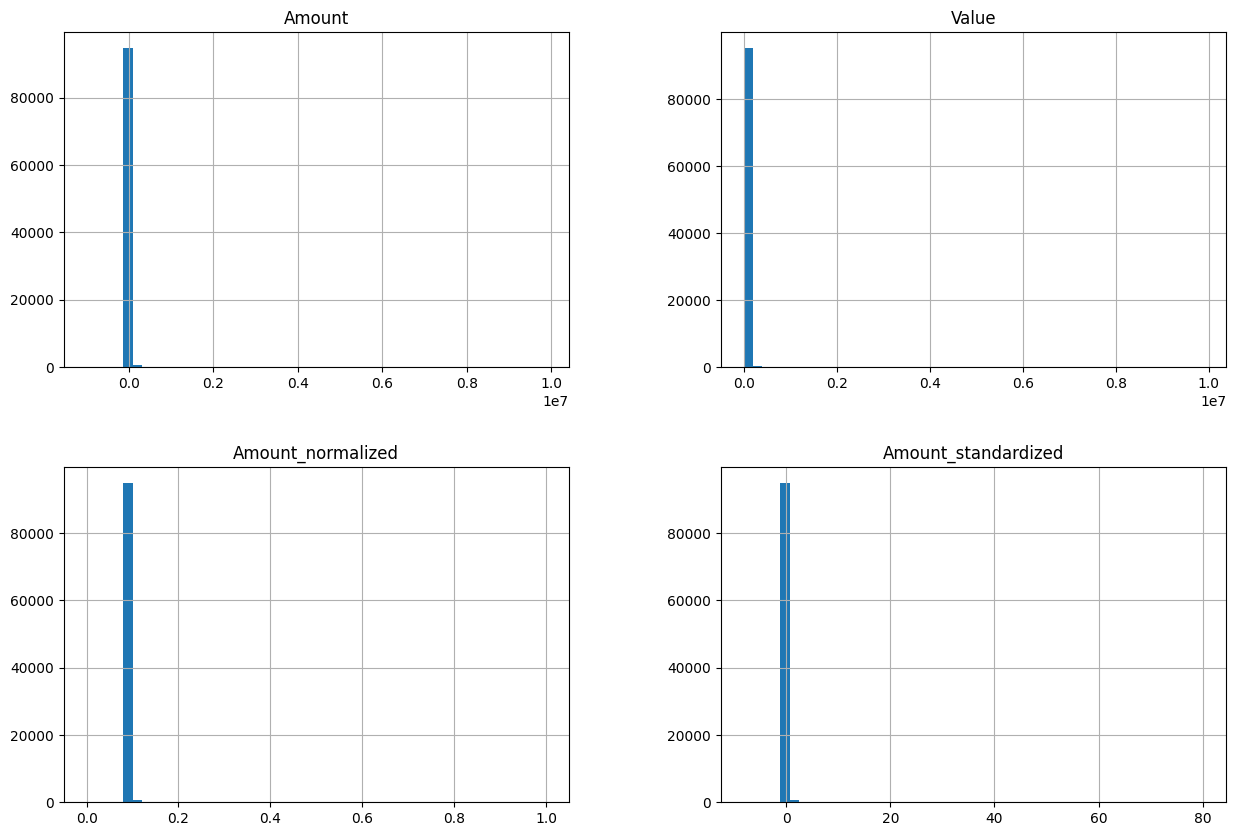

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [15]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Amount,Value,transaction_hour,transaction_day,transaction_month,transaction_year,Amount_normalized,Amount_standardized
Amount,1.000000,0.989692,-0.001611,-0.003905,-0.009060,0.010738,1.000000,1.000000
Value,0.989692,1.000000,0.000474,-0.024104,-0.010452,0.012001,0.989692,0.989692
transaction_hour,-0.001611,0.000474,1.000000,-0.019464,0.012241,-0.009621,-0.001611,-0.001611
transaction_day,-0.003905,-0.024104,-0.019464,1.000000,0.207837,-0.247493,-0.003905,-0.003905
transaction_month,-0.009060,-0.010452,0.012241,0.207837,1.000000,-0.996205,-0.009060,-0.009060
transaction_year,0.010738,0.012001,-0.009621,-0.247493,-0.996205,1.000000,0.010738,0.010738
Amount_normalized,1.000000,0.989692,-0.001611,-0.003905,-0.009060,0.010738,1.000000,1.000000
Amount_standardized,1.000000,0.989692,-0.001611,-0.003905,-0.009060,0.010738,1.000000,1.000000


In [16]:

df['Amount'] = df['Amount'].fillna('DebtCon')

df.stb.freq(['Amount'], style = True)

,Amount,count,percent,cumulative_count,cumulative_percent
0,1000.000000,"17,091",17.87%,"17,091",17.87%
1,-50.000000,"8,513",8.90%,"25,604",26.77%
2,10000.000000,"8,260",8.63%,"33,864",35.40%
3,2000.000000,"5,489",5.74%,"39,353",41.14%
4,500.000000,"5,246",5.48%,"44,599",46.62%
5,-5000.000000,"5,110",5.34%,"49,709",51.96%
6,5000.000000,"4,595",4.80%,"54,304",56.77%
7,-20.000000,"2,608",2.73%,"56,912",59.49%
8,-100.000000,"2,405",2.51%,"59,317",62.01%
9,-1000.000000,"2,345",2.45%,"61,662",64.46%


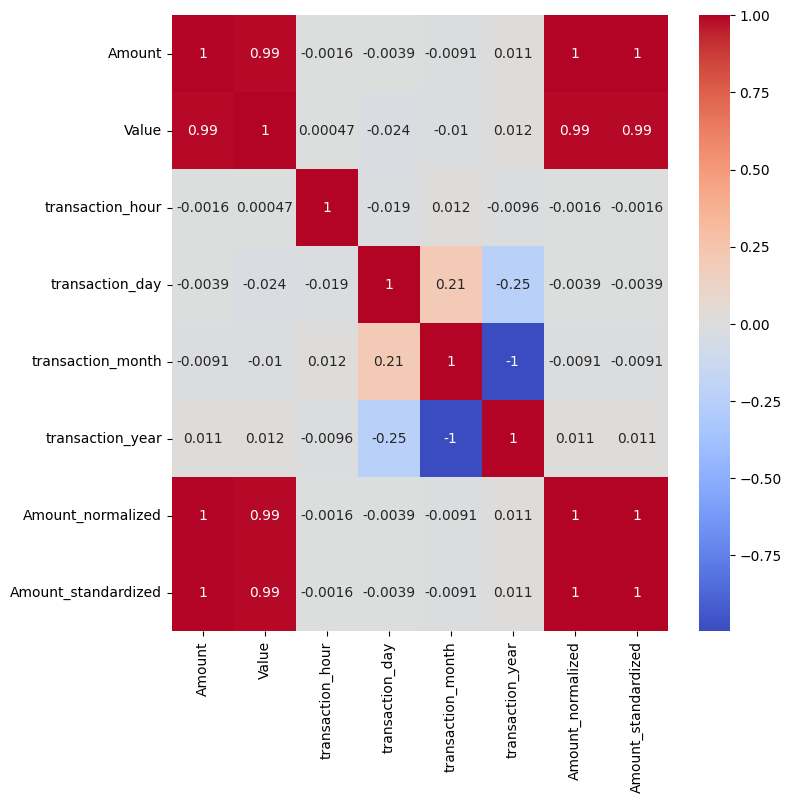

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

In [18]:

import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [19]:
df=pd.read_csv('../data/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [20]:
train, test = sc.split_df(df, 'Amount', ratio = 0.7, seed = 999).values()

In [27]:
# var = train.drop(['Amount', 'Value' ], axis = 1).columns
# y_var = train['Amount']

# def woe_num(x, y):
#   bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
#   global breaks
#   breaks = {}
#   for i in x:
#     bin_object.fit(train[[y, i]])
#     breaks[i] = (bin_object.bins[1:-1].tolist())
#   return breaks


import pandas as pd
import numpy as np

# Assuming 'train' is your DataFrame
# Convert 'Amount' and other necessary columns to numeric
train['Amount'] = pd.to_numeric(train['Amount'], errors='coerce')

# Drop non-relevant columns and convert the rest to numeric
var = train.drop(['Amount', 'Value'], axis=1).columns
for col in var:
    train[col] = pd.to_numeric(train[col], errors='coerce')

# Check for NaN values and drop rows with NaNs in relevant columns
train.dropna(subset=['Amount'] + list(var), inplace=True)

# Ensure that the data types are correct after conversion
print("Data types after processing:")
print(train.dtypes)

# Define the function to calculate Weight of Evidence
def woe_num(x, y):
    bin_object = Binning(y, n_threshold=50, y_threshold=10, p_threshold=0.35, sign=False)
    global breaks
    breaks = {}
    for i in x:
        try:
            print(f"Processing variable: {i}")  # Debugging line
            # Fit the binning object
            bin_object.fit(train[[y, i]])
            breaks[i] = (bin_object.bins[1:-1].tolist())
        except Exception as e:
            print(f"Error processing variable {i}: {e}")  # Catching and displaying errors
    return breaks

# Call the function
woe_result = woe_num(var, 'Amount')


Data types after processing:
TransactionId           float64
BatchId                 float64
AccountId               float64
SubscriptionId          float64
CustomerId              float64
CurrencyCode            float64
CountryCode               int64
ProviderId              float64
ProductId               float64
ProductCategory         float64
ChannelId               float64
Amount                  float64
Value                     int64
TransactionStartTime    float64
PricingStrategy           int64
FraudResult               int64
dtype: object


Data types after processing:
TransactionId           float64
BatchId                 float64
AccountId               float64
SubscriptionId          float64
CustomerId              float64
CurrencyCode            float64
CountryCode               int64
ProviderId              float64
ProductId               float64
ProductCategory         float64
ChannelId               float64
Amount                  float64
Value                     int64
TransactionStartTime    float64
PricingStrategy           int64
FraudResult               int64
dtype: object
Skipping variable TransactionId as it has no valid data.
Skipping variable BatchId as it has no valid data.
Skipping variable AccountId as it has no valid data.
Skipping variable SubscriptionId as it has no valid data.
Skipping variable CustomerId as it has no valid data.
Skipping variable CurrencyCode as it has no valid data.
Skipping variable CountryCode as it has no valid data.
Skipping variable ProviderId as it has no valid data.
Skippin

In [41]:
# Check categorical variables names
bins = sc.woebin(train, y = 'Amount', x = ['Value'], save_breaks_list = 'cat_breaks')

[INFO] creating woe binning ...


Exception: Incorrect inputs; the length of unique values in y column 'Amount' != 2.